In [19]:
import pandas as pd
from pathlib import Path
import sys
import statsmodels.api as sm
from statsmodels.tools import add_constant
import matplotlib.pyplot as plt
from fcutils.plot.figure import clean_axes
from sklearn.model_selection import KFold
from myterial import teal_dark, teal, indigo_dark, blue_darker, pink, salmon_dark

colors = dict(
    s=teal_dark,
    curv_10cm=teal,
    curv_15cm=teal,
    curv_20cm=teal,
    curv_30cm=teal,
    v=salmon_dark, 
    dv_250ms=pink,
    dv_500ms=pink,
    dv_1000ms=pink,
    omega=blue_darker,
    domega_250ms=indigo_dark,
    domega_500ms=indigo_dark,
    domega_1000ms=indigo_dark,
)


sys.path.append("./")
sys.path.append(r"C:\Users\Federico\Documents\GitHub\pysical_locomotion")
from analysis.ephys.utils import get_recording_names

glm_cache = Path(
    r"D:\GLM\data"
)



In [20]:
TARGET = "MOs"
recordings = get_recording_names(region=TARGET)
# all_data = [
#     pd.read_hdf(glm_cache / f"{rec}_bouts.h5") for rec in recordings
# ]

# data = all_data[-1]

data = pd.read_hdf(glm_cache / f"{recordings[2]}_bouts.h5")



In [21]:
# normalize df
variables = ("v", "v_squared", "dv_300ms", "omega", "domega_300ms", "omega_squared", "apex_distance")
units = [c for c in data.columns if c not in variables and "shuffle" not in c]

df = data[units]
df_norm = (df - df.mean()) / df.std()

activty = df_norm[units]

select data in more constraint variables ranges

In [22]:
vmin = 20
vmax = 50
omega_min = -150
omega_max = 150
apex_distance_min = 10
apex_distance_max = 40
dv_min = -25
dv_max = 25
domega_min = -200
domega_max = 200

good_cols = [c for c in data.columns if "shuffle" not in c]
df = data[good_cols]
# df = df.loc[
#     (df.v > vmin) &
#     (df.v < vmax) &
#     (df.omega > omega_min) &
#     (df.omega < omega_max) &
#     (df.apex_distance > apex_distance_min) &
#     (df.apex_distance < apex_distance_max) &
#     (df.dv_300ms > dv_min) &
#     (df.dv_300ms < dv_max) &
#     (df.domega_300ms > domega_min) &
#     (df.domega_300ms < domega_max)
# ][units]
df = data[units]

df_norm = (df - df.mean()) / df.std()


In [23]:
# df_norm.dropna(axis=1, inplace=True)

<matplotlib.collections.PathCollection object at 0x00000265161DB820>

<Figure size 864x864 with 1 Axes>

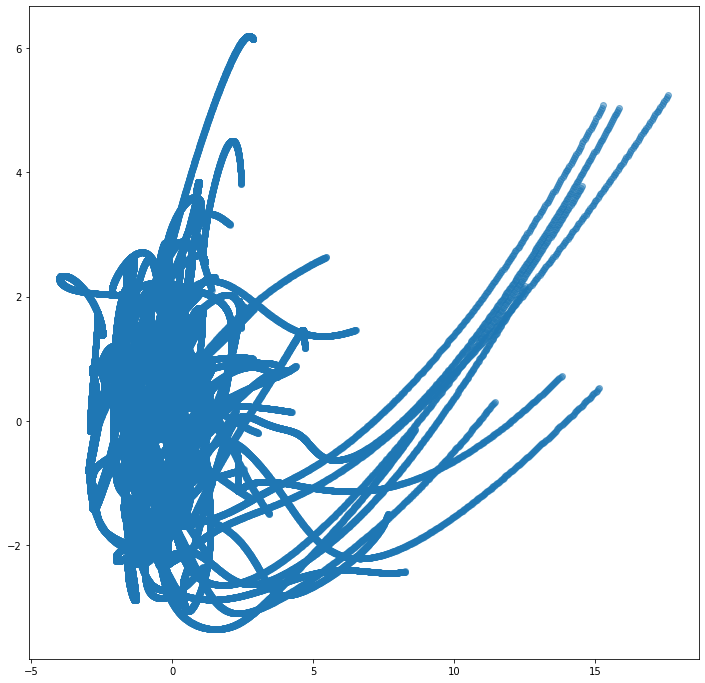

In [24]:
from sklearn.decomposition import PCA

# plot first 2 PC
pca = PCA(n_components=2)
pca.fit(df_norm)
df_pca = pca.transform(df_norm)

f, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.scatter(df_pca[:, 0], df_pca[:, 1], alpha=.5)

<matplotlib.collections.PathCollection object at 0x0000026516295580>

<Figure size 432x288 with 1 Axes>

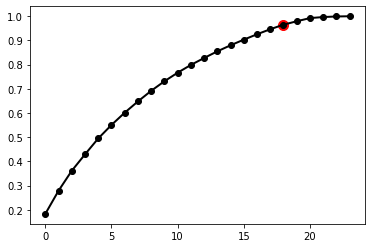

In [25]:
# plot fraction of variance explained by each PC

import numpy as np
pca = PCA(n_components=df_norm.shape[1])
pca.fit(df_norm)

v = np.cumsum(pca.explained_variance_ratio_)
plt.plot(v, "o-", lw=2, color="k")

th = np.argwhere(v > 0.95)[0][0]
plt.scatter(th, v[th], color="r", s=100)
